# Problem 2
Your task is to provide a data-driven strategic recommendation for the upcoming category review. To achieve this, you must first analyze the current purchasing trends and behaviors to understand the customer segments and their chip purchasing behavior. To describe the customers' purchasing behavior, you need to identify relevant metrics. The client has a specific interest in understanding the chip purchasing behavior of different customer segments.
To begin the task, download the comma-separated values (CSV) data files provided to you and conduct preliminary data checks, including:
1. Generating and interpreting high-level data summaries.
2. Identifying any outliers and, if necessary, removing them (if applicable).
3. Verifying the data formats and correcting them, if needed (if applicable).

# 1. Importing Data and Summary
Start by loading the transaction and customer data from the provided CSV files. We want to:
1. Generate summaries of the data to get an understanding of its shape, size, and general structure.
2. Use describe() for numeric columns and value_counts() for categorical columns.
3. Check for missing values with isnull().sum().

In [5]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
df1['TOT_SALES'].describe()

count    264836.000000
mean          7.304200
std           3.083226
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max         650.000000
Name: TOT_SALES, dtype: float64

In [7]:
df1.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [9]:
df2.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

# 2. Data Cleaning
1. Missing data: If there are any null values in critical columns(TOTAL_SALES), decide whether to replace missing values or drop the rows, depends on the data distribution.
2. Outliers: Use boxplots/standard deviation methods to detect any extreme values in TOTAL_SALES.

In [11]:
q1 = df1['TOT_SALES'].quantile(0.25)
q3 = df1['TOT_SALES'].quantile(0.75)
IQR = q3 - q1

threshold = 1.5
outliers = df1[(df1['TOT_SALES']<q1 - IQR*threshold) | (df1['TOT_SALES'] > q3 + IQR*threshold)]
outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
11,43332,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0
56,43601,74,74336,73182,84,GrnWves Plus Btroot & Chilli Jam 180g,5,15.5
72,43331,96,96203,96025,7,Smiths Crinkle Original 330g,5,28.5
100,43605,130,130108,134125,2,Cobs Popd Sour Crm &Chives Chips 110g,5,19.0
...,...,...,...,...,...,...,...,...
258715,43328,194,194381,194835,102,Kettle Mozzarella Basil & Pesto 175g,4,21.6
258721,43327,200,200248,199694,3,Kettle Sensations Camembert & Fig 150g,4,18.4
258726,43332,203,203253,203360,28,Thins Potato Chips Hot & Spicy 175g,5,16.5
258729,43601,208,208205,207318,37,Smiths Thinly Swt Chli&S/Cream175G,5,15.0


# 3. Feature Engineering
1. Extract PACK_SIZE from the Product Name
2. Calculate various values such as 'Average prices' and 'Sales per product unit'

In [1]:
def pack_size(product):
    match = re.search(r'(\d+)(g)',product)
    if match:
        return int(match.group(1))
    else:
        return None

df1['PACK_SIZE'] = df1['PROD_NAME'].apply(pack_size)
df1.head()

NameError: name 'df1' is not defined

In [17]:
df1['PACK_SIZE'].isnull().sum()

6064

In [18]:
df1['PACK_SIZE'] = df1['PACK_SIZE'].fillna(df1['PACK_SIZE'].median())

In [19]:
df1['SALES_PER_UNIT'] = df1['TOT_SALES'] / df1['PROD_QTY']
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,SALES_PER_UNIT
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,3.000000
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,2.100000
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,1.450000
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,7.4,175.0,1.480000
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,7.4,150.0,2.466667


# 4. Merging Datasets
Now, once the data cleaning and processing is done on both the datasets, we'll merge the datasets on a shared key(LYLTY_CARD_NBR)

In [21]:
df = pd.merge(df1,df2,on='LYLTY_CARD_NBR')

In [27]:
df.head(8)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,SALES_PER_UNIT,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,3.000000,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,2.100000,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,1.450000,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,7.4,175.0,1.480000,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,7.4,150.0,2.466667,MIDAGE SINGLES/COUPLES,Budget
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300.0,5.100000,MIDAGE SINGLES/COUPLES,Budget
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0,5.700000,MIDAGE SINGLES/COUPLES,Budget
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210.0,3.600000,MIDAGE SINGLES/COUPLES,Budget


# 5. Customer Data Analysis

In [30]:
customer_sales = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['sum', 'mean']).reset_index()
customer_sales.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOTAL_SALES', 'AVG_SALES']
customer_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOTAL_SALES,AVG_SALES
0,MIDAGE SINGLES/COUPLES,Budget,35698.10,7.111175
1,MIDAGE SINGLES/COUPLES,Mainstream,90203.10,7.596690
2,MIDAGE SINGLES/COUPLES,Premium,58764.95,7.152501
3,NEW FAMILIES,Budget,22141.05,7.368070
4,NEW FAMILIES,Mainstream,17153.35,7.377785
5,NEW FAMILIES,Premium,11590.90,7.294462
6,OLDER FAMILIES,Budget,167540.85,7.234061
7,OLDER FAMILIES,Mainstream,102766.20,7.214701
8,OLDER FAMILIES,Premium,80373.70,7.181353
9,OLDER SINGLES/COUPLES,Budget,136460.40,7.413506


In [32]:
pack_size_sales = df.groupby(['PACK_SIZE','LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['sum', 'mean']).reset_index()
pack_size_sales.columns = ['PACK_SIZE','LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOTAL', 'AVG']
pack_size_sales

,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER,TOTAL,AVG
0,70.0,MIDAGE SINGLES/COUPLES,Budget,137.40,5.088889
1,70.0,MIDAGE SINGLES/COUPLES,Mainstream,250.40,5.008000
2,70.0,MIDAGE SINGLES/COUPLES,Premium,345.80,5.403125
3,70.0,NEW FAMILIES,Budget,65.00,5.000000
4,70.0,NEW FAMILIES,Mainstream,41.00,5.125000
...,...,...,...,...,...
436,380.0,YOUNG FAMILIES,Mainstream,2681.75,9.476148
437,380.0,YOUNG FAMILIES,Premium,2421.00,9.135849
438,380.0,YOUNG SINGLES/COUPLES,Budget,1601.40,8.750820
439,380.0,YOUNG SINGLES/COUPLES,Mainstream,5676.90,9.068530


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(1, 0, 'NEW FAMILIES'),
  Text(2, 0, 'OLDER FAMILIES'),
  Text(3, 0, 'OLDER SINGLES/COUPLES'),
  Text(4, 0, 'RETIREES'),
  Text(5, 0, 'YOUNG FAMILIES'),
  Text(6, 0, 'YOUNG SINGLES/COUPLES')])

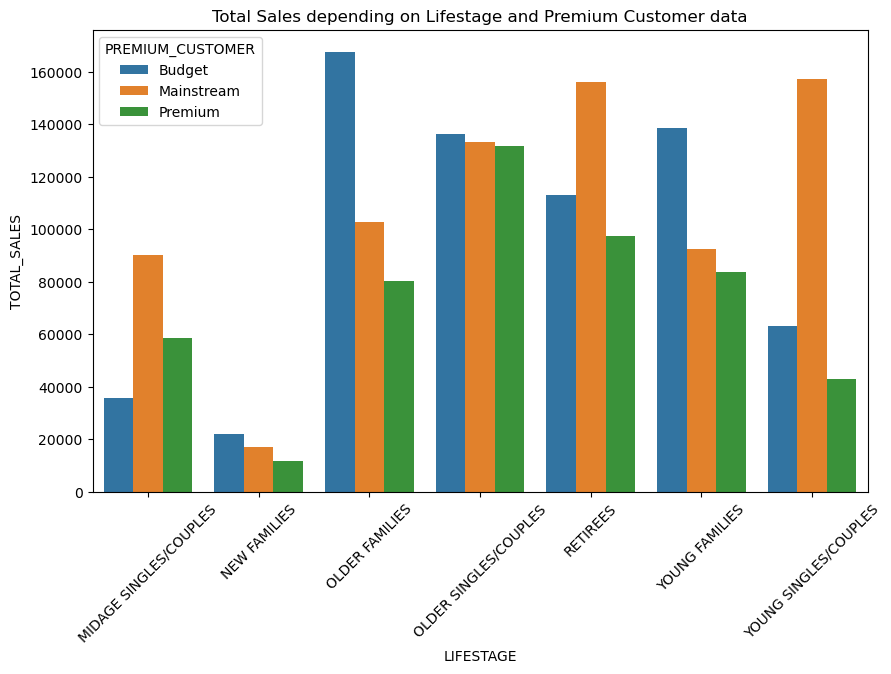

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x='LIFESTAGE', y='TOTAL_SALES', hue='PREMIUM_CUSTOMER', data=customer_sales)
plt.title('Total Sales depending on Lifestage and Premium Customer data')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(1, 0, 'NEW FAMILIES'),
  Text(2, 0, 'OLDER FAMILIES'),
  Text(3, 0, 'OLDER SINGLES/COUPLES'),
  Text(4, 0, 'RETIREES'),
  Text(5, 0, 'YOUNG FAMILIES'),
  Text(6, 0, 'YOUNG SINGLES/COUPLES')])

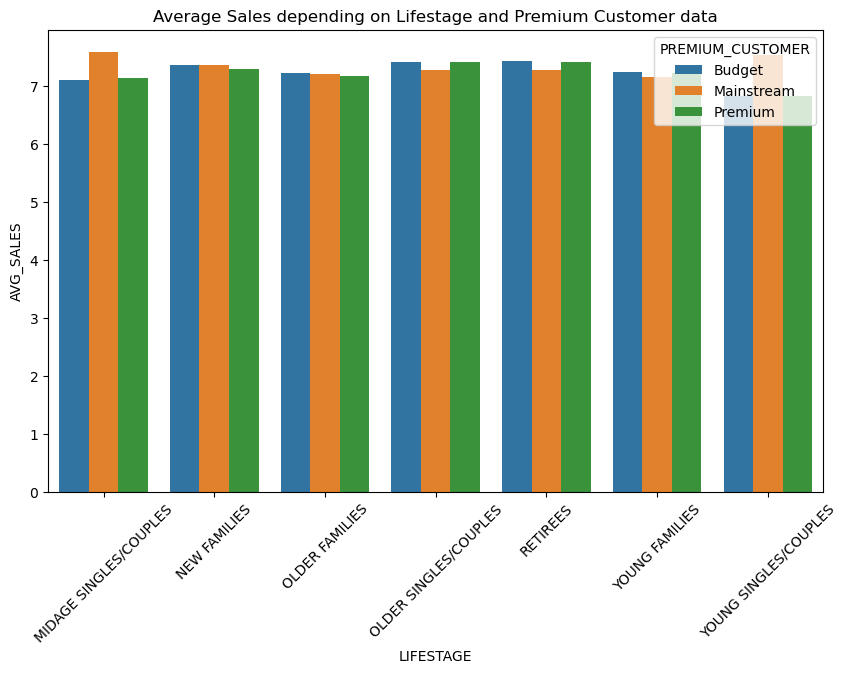

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x='LIFESTAGE', y='AVG_SALES', hue='PREMIUM_CUSTOMER', data=customer_sales)
plt.title('Average Sales depending on Lifestage and Premium Customer data')
plt.xticks(rotation=45)

In [36]:
correlation = pack_size_sales[['PACK_SIZE','TOTAL']].corr()
correlation

,PACK_SIZE,TOTAL
PACK_SIZE,1.000000,-0.022182
TOTAL,-0.022182,1.000000


(array([ 50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400')])

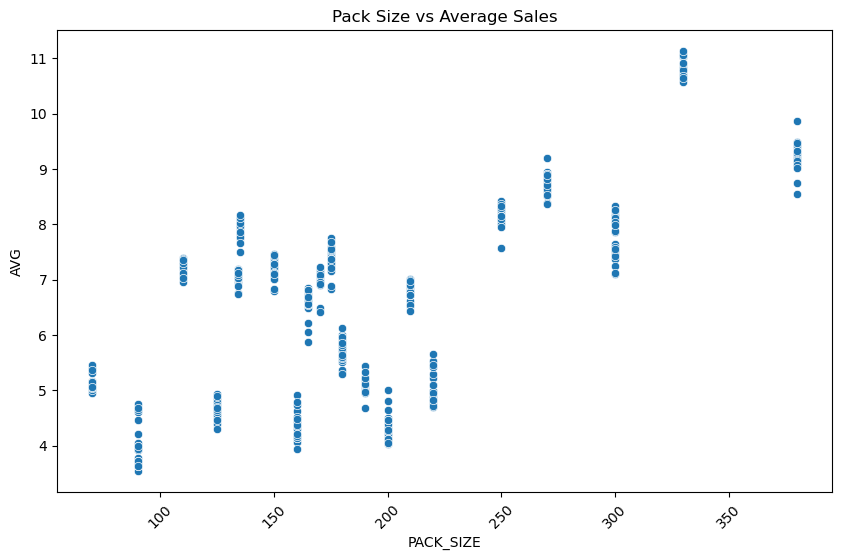

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PACK_SIZE', y='AVG', data=pack_size_sales)
plt.title('Pack Size vs Average Sales')
plt.xticks(rotation=45)

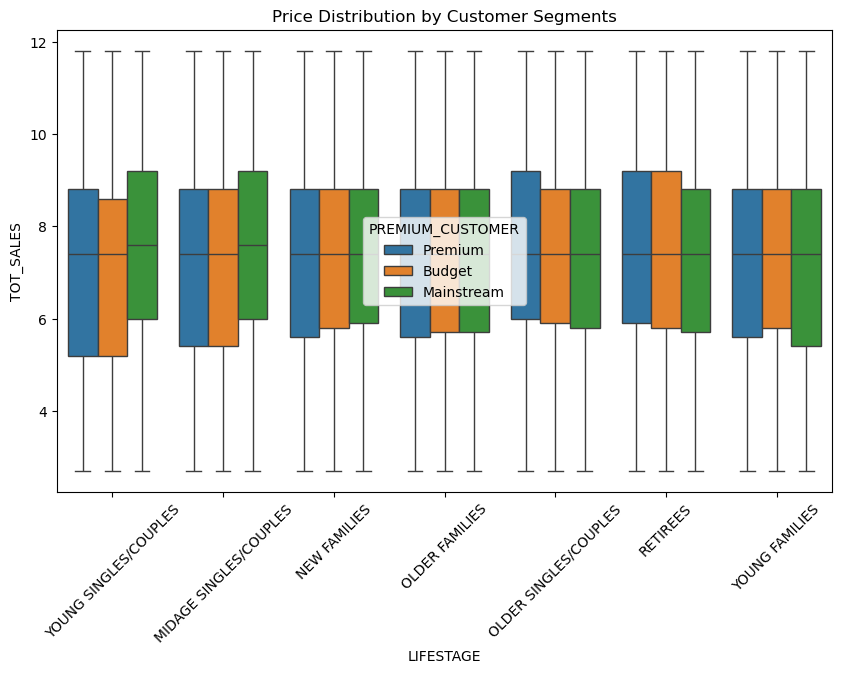

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=df)
plt.title('Price Distribution by Customer Segments')
plt.xticks(rotation=45)
plt.show()

# Objective:
Provide a data-driven strategic recommendation for an upcoming category review by analyzing chip purchasing behaviors across different customer

# Overview:
We worked with two datasets:
1. Transaction Data: Contains sales transactions including product names, quantities, total sales, and other details.
2. Customer Data: Contains customer information like lifestage and premium customer status.

**Data Cleaning:**
1. Handled outliers using IQR method.
2. Addressed missing values by filling with medians where appropriate.
3. Extracted additional features such as PACK_SIZE from product names and computed SALES_PER_UNIT.

**Feature Engineering:**
1. Created metrics like SALES_PER_UNIT to better understand per-product performance.
2. Merged transaction data with customer information for enhanced analysis.

**Customer Data Analysis:**
Grouped customers by LIFESTAGE and PREMIUM_CUSTOMER to examine total and average sales.

**Pack Size and Sales Correlation:**
Analyzed the relationship between chip pack sizes and total/average sales.

**Visualization:**
1. Bar plots of total and average sales by customer segment and premium status.
2. Box plots highlighting price distribution across customer segments.
3. Scatter plots of packet sizes  across the average sales.

# Key Results:
1. Older Families and Retirees in both mainstream and premium categories showed high total sales.
2. Young Singles/Couples exhibited lower average sales compared to other categories.
3. Sales were relatively affected by the size of chip packs.

# Conclusion:
Targeting Older Families and Retirees in marketing campaigns may lead to higher returns due to their demonstrated purchasing power.
Additional promotional efforts for Young Singles/Couples could help boost sales in that category.